# Project : Analyse exploratoire de - [noshowappointments-kagglev2-may-2016] - Dataset

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#adlf">Préparation des données</a></li>
<li><a href="#adf">Analyse exploratoire des données</a></li>
<li><a href="#conclusion">Conclusions</a></li>
<li><a href="#limite">Limites</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description de la Dataset 

> La Dataset dont nous sommes sur le point d'analyser est celle d'un ensemble de données recueillant des informations sur 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous.

### Qestionnaires d'exploration
<ul>
<li><a href="#Q1">Question 1 : Quelle est le pourcentage des patients qui ont honoré à leur rendez-vous ?</a></li>
<li><a href="#Q2">Question 2 : L'obtention de la bourse a t-elle une inflience sur le respect des rendez-vous ?</a></li>
<li><a href="#Q3">Question 3 : Quel serait la distribution du genre sur l'âge ?</a></li>
<li><a href="#Q4">Question 4 : Quel serait la répartition des âges sur l'effectif des patients ?</a></li>
</ul>

<a id='adlf'></a>
## Préparation des données

> Dans cette première partie, nous allons :
  - Importer les paquets nécessaires pour notre analyse;
  - Importer notre Dataset et afficher ses premières lignes;
  - Identifier les nombres de ligne et colonne;
  - Vérifier si elle contient des valeurs manquantes et supprimer les colonnes non pertinantes pour l'analyse;
  - Rechercher les doublons et les supprimer éventuellement;
  - Explorer les variables et leurs types.

In [1]:
# Importation des bibliothèques  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lecture de la Dataset et affichage des premières lignes. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Identification des nombres de lignes et de colonne
df.shape

(110527, 14)

##### Notre Dataset contient 110.527 lignes et 14 colonnes

In [4]:
# Vérification de l'existance des valeurs manquantes
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### La Dataset ne contient pas de données manquantes

In [5]:
# Vérification des doublons
df.duplicated().sum()

0

##### La Dataset ne contient pas de données en doublon

In [6]:
# Suppression des colonnes non impliqués dans l'analyse
df = df.drop(['PatientId',
              'AppointmentID',
              'ScheduledDay',
              'AppointmentDay',
              'Neighbourhood',
              'Hipertension',
              'Diabetes',
              'Alcoholism',
              'Handcap'], 
             axis=1)

df.head()

,Gender,Age,Scholarship,SMS_received,No-show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


In [7]:
# Vérification des types de données
df.dtypes

Gender          object
Age              int64
Scholarship      int64
SMS_received     int64
No-show         object
dtype: object

In [8]:
# Explorons en résumé l'état de la Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 5 columns):
Gender          110527 non-null object
Age             110527 non-null int64
Scholarship     110527 non-null int64
SMS_received    110527 non-null int64
No-show         110527 non-null object
dtypes: int64(3), object(2)
memory usage: 4.2+ MB


### Faisons une lecture statistique rapide de notre DataFrame 

In [9]:
# Statistique rapide de la DataFrame
df.describe()

,Age,Scholarship,SMS_received
count,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.321026
std,23.110205,0.297675,0.466873
min,-1.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000
75%,55.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000


##### A partir ce cette description, nous pouvons noter :
- La moyenne d'âge des patients est de 37 ans;
- le patient le plus âgé a 115 ans;
- 50% de patients ont la moyenne d'age;
- Seul 32% de patient en moyenne ont reçu un SMS de rappel;
- Seul environ 10% de patients sont inscrit au programme d'aide;
- Antre autres

<a id='adf'></a>
## Analyse exploratoire des données


> Dans cette session, nous allons tenter de trouver des réponses aux questions que nous nous sommes poséés.

### Tout dabord, nous alons définir quelques fonctions dont nous aurons besoin tout au long de notre analyse

In [76]:
# Fonction de calcul de taux
def taux(argument_1, argument_2):
    return argument_1[argument_2].value_counts(normalize=True)

# Fonction de filtre de données
def filtre(argument_1, argument_2, argument_3):
    return argument_1[argument_1[argument_2] == argument_3]

# Fonction de définition de l'histogramme de visualisation
def histogramme(argument_1, argument_2, titre, label_x, label_y):
    argument_1[argument_2].hist(figsize=(5,5))
    plt.title(titre)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
# Fonction de définition du nuage de point de visualisation
def nuage(argument_1, argument_2, titre, label_x, label_y):
    figure = plt.figure(figsize=(8,8))
    plt.scatter(x=argument_1, y=argument_2)
    plt.title(titre)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

<a id='Q1'></a>
### Question 1 : Quelle est le pourcentage des patients qui ont honoré à leur rendez-vous ?

In [11]:
# Pourcentage de patients ayant honoré à leur rendez-vous
patient_no = taux(df, 'No-show')
patient_no

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

##### Ainsi, environ 80% de patients ont répondu présent à leur rendez-vous, contre 20% qui ne s'y sont pas prêtés.

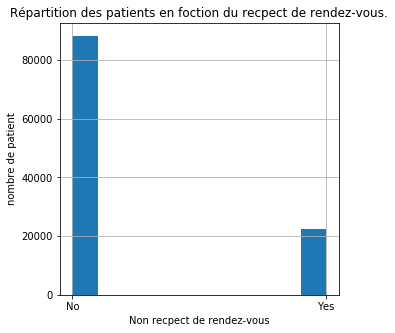

In [28]:
# Visualison ce résultat à partir d'un histogramme.
histogramme(df, 'No-show', 
            'Répartition des patients en foction du recpect de rendez-vous.',
            'Non recpect de rendez-vous', 
            'nombre de patient')

##### Nous pouvons conclure qu'il ya une forte volontée chez les patients à honorer leur rendez-vous car un peu plus de 90.000 patients ont respecté leur rendez-vous contre envirion 22.000 qui le l'on pas fait.

<a id='Q2'></a>
### Question 2 : L'obtention de la bourse a t-elle une inflience sur le respect des rendez-vous  ?
        
        
> Pour répondre à cette question, nous allons dans un premier temps isoler la Dataset des patients qui ont honoré à leur rendez-vous et par la suite déterminer le taux des boursiers dans ceux-ci.

In [14]:
# Nombre de patient n'ayant pas respecté leur rendez-vous 
df_yes = filtre(df, 'No-show', 'Yes') 
df_yes.head()

,Gender,Age,Scholarship,SMS_received,No-show
6,F,23,0,0,Yes
7,F,39,0,0,Yes
11,M,29,0,1,Yes
17,F,40,1,0,Yes
20,F,30,0,0,Yes


In [15]:
# Pourcentage des inscrits au programme et qui n'honore pas à leur rendez-vous
schol_yes = taux(df_yes, 'Scholarship')
schol_yes

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

##### On note que, parmis les patient qui n'ont pas honoré à leur rendez-vous (20%), environ 88% sont inscrit au programme d'aide, contre 12% qui ne le sont pas.

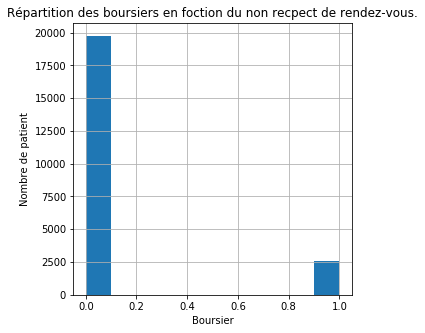

In [29]:
# Visualisons l'histogramme de cette relation entre 
# l'inscription au programme d'aide et le non respect du rendez-vous 
 
histogramme(df_yes, 'Scholarship', 
           'Répartition des boursiers en foction du non recpect de rendez-vous.',
           'Boursier',
           'Nombre de patient')

##### nous relevons à partir de l'histogramme que seul 2500 patients non boursiers n'ont pas respecté leur rendez-vous contre un peut plus de 19.000 boursiers. <br/><br/>On peut donc penser que la bourse tant plustôt à décourager les patients quand au respect des rendez-vous.

<a id='Q3'></a>
### Question 3 : Quel serait la distribution du genre sur l'âge ?

> Pour repondre à cette questions, nous allons déterminez les proportions par genre des patients.


In [40]:
genre_yes = taux(df, 'Gender')
genre_yes

F    0.649977
M    0.350023
Name: Gender, dtype: float64

##### On note qu'environ 65% de patient ressencés sont des femmes , contre 35% d'homme.

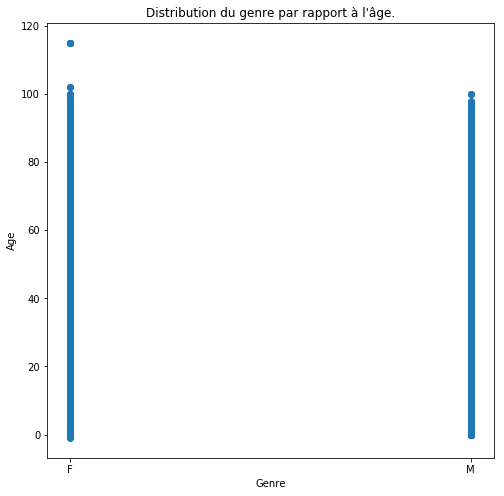

In [77]:
# Visualisons la relation 
# entre le genre et l'âge à l'aide du graphe En nuage de point
nuage(df.Gender, df.Age, "Distribution du genre par rapport à l'âge.", 
      'Genre', 'Age')

##### Nous pouvons relever à partir de ce nuage de Point qu'aussi bien les homme que les femmes ont été recensé à tous les tranches d'âge, à l'exception de quelques femmes recensées au delà de 100 ans.

<a id='Q4'></a>
### Question 4 : Quel serait la répartition des âges sur l'effectif des patients ?


In [18]:
# Détermination de la moyenne d'âge

moy_age = int(df.Age.mean())
moy_age

37

##### La moyenne d'âge des patients est de 37 ans.

In [71]:
# Regroupons l'effectif par tranche D'âge
df.Age.value_counts(dropna=True)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

##### Nous pouvons lire que la majorité des patients (soit 3539 patients) ont pour âge 0 an et un patient a un âge négatif. <br/><br/> Nous pouvons donc pensé à une incohérence des données liées à l'âge des patients.

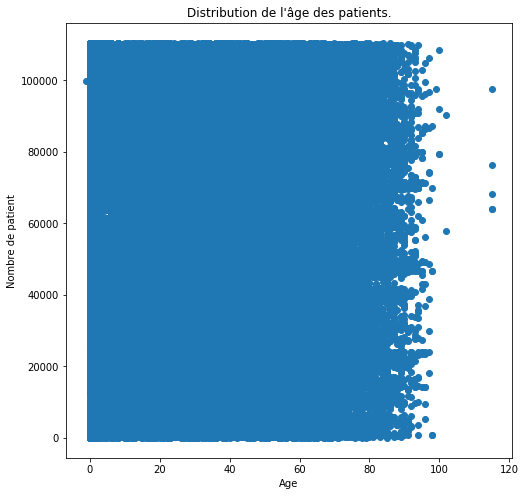

In [78]:
# Visualisons la répartition de l'âge des PaTIEnts 
# à l'aide du graphe En nuage de point
nuage(df.Age, df.index, "Distribution de l'âge des patients.", 
      'Age', 'Nombre de patient')

##### Nous observons que seul quelques patients ont un âge supérieur à 90 ans. <br/><br/> On peut conclure que tous les tranches d'âge sont considérées.

<a id='conclusion'></a>
## Conclusions

> Arrivé au terme de l'exploration de la Dataset noshowappointments-kagglev2-may-2016.csv qui traite de la présence ou non des patients aux rendez-vous, nous avons pu relevé que:
- La Dataset semble avoir été netoyé au préalable car elle ne contient ni de données manquantes, ni de doublons;
- La grande majorité de patient (80%) ont répondu présent aux rendez-vous;
- La grande majorité de ceux qui n'ont pas répondu présent au rendez-vous (88%) sont inscrit au programme de bien-être Brésilien;
- Le genre féminin sont plus retissantes à honorer au rendez-vous (65%) contre 35% du genre masculin;
- Il y a un équilibre de Genre dans chanque tranche d'âge sélectionnée. Néanmoins quelques patients féminins ont au delà de la centaine;
- On relève également une incohérence au niveau de l'âge des patients, avec une grande majorité 0 0 an et un à âge négatif;
- La grande majorité des patients ont un âge compris entre 0 et 80 ans.

> Nous pourrions étendre notre exploration sur la corrélation entre les types de pathologies des patients et leurs tendances à respecter leurs rendez-vous.

<a id='limite'></a>
## Limites
> pour l'exploration de notre Dataset, nous nous sommes confronté à un aspect limitant notamment les types de variables. En ce sens que, les variables sur lesquelles nous avons axé notre exploration étaient principalement constituées de données sous forme booléennes (soit 0 ou 1, soit Yes ou No). ceci nous a posé un réel handicape dans notre désir d'utiliser différentes graphiques de visualisation pour mieux apprecier les corrélations. nous avont par cela été contraint à n'utiliser que des graphiques en bar plot, les seuls à nous présenter les figures interessantes.

In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_noshowappointments-kagglev2-may-2016_Dataset.ipynb'])

0